In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon = pd.read_csv('./amazon_cells_labelled.txt', sep='\t', header=None)
imdb = pd.read_csv('./imdb_labelled.txt', sep='\t', header=None)
yelp = pd.read_csv('./yelp_labelled.txt', sep='\t', header=None)

In [65]:
np.random.seed(400)

In [156]:
import nltk
import pandas as pd
import numpy as np
import string
from collections import defaultdict

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
from wordcloud import WordCloud, STOPWORDS 

In [138]:
def draw_wordcloud(text_data, stopwords=None):
    words = ' '
    for line in text_data:
        for word in line:
            words = words + word + ' '

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(words) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [132]:
def lower_tokenize(text_data):
    text_data = [entry.lower() for entry in text_data]
    text_data = [word_tokenize(entry) for entry in text_data]
    return text_data

# Wstępna analiza

In [3]:
amazon

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


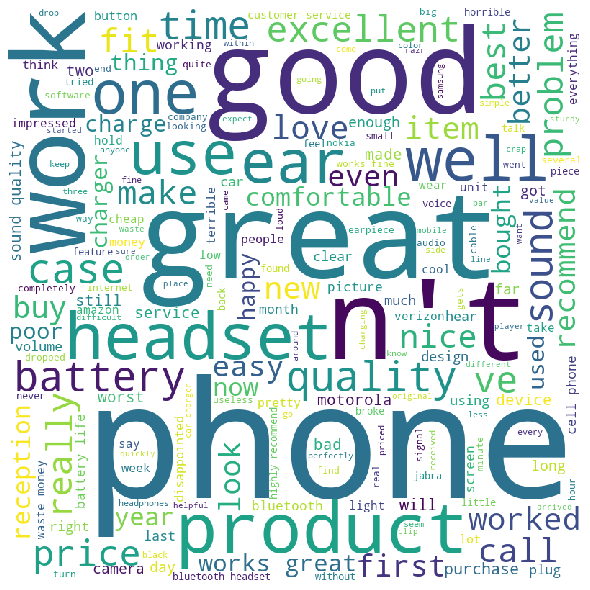

In [137]:
amazon_text = lower_tokenize(amazon[0])
draw_wordcloud(amazon_text)

In [4]:
imdb

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


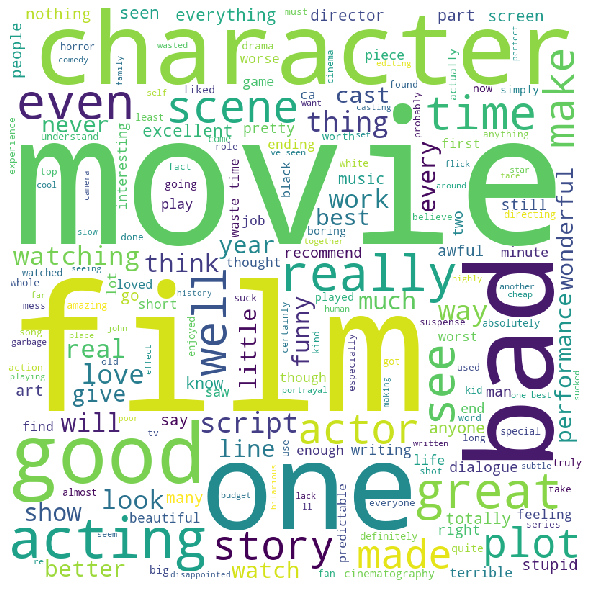

In [145]:
imdb_text = lower_tokenize(imdb[0])
draw_wordcloud(imdb_text, stopwords=STOPWORDS.add('n\'t'))

In [5]:
yelp

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


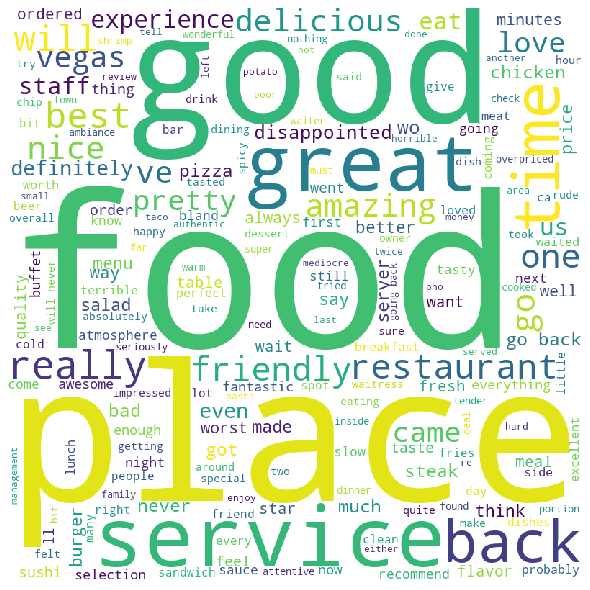

In [146]:
yelp_text = lower_tokenize(yelp[0])
draw_wordcloud(yelp_text)#, stopwords=STOPWORDS.add('n\'t'))

In [6]:
print(np.count_nonzero(amazon[1])/amazon.shape[0])
print(np.count_nonzero(imdb[1])/imdb.shape[0])
print(np.count_nonzero(yelp[1])/yelp.shape[0])

0.5
0.516042780748663
0.5


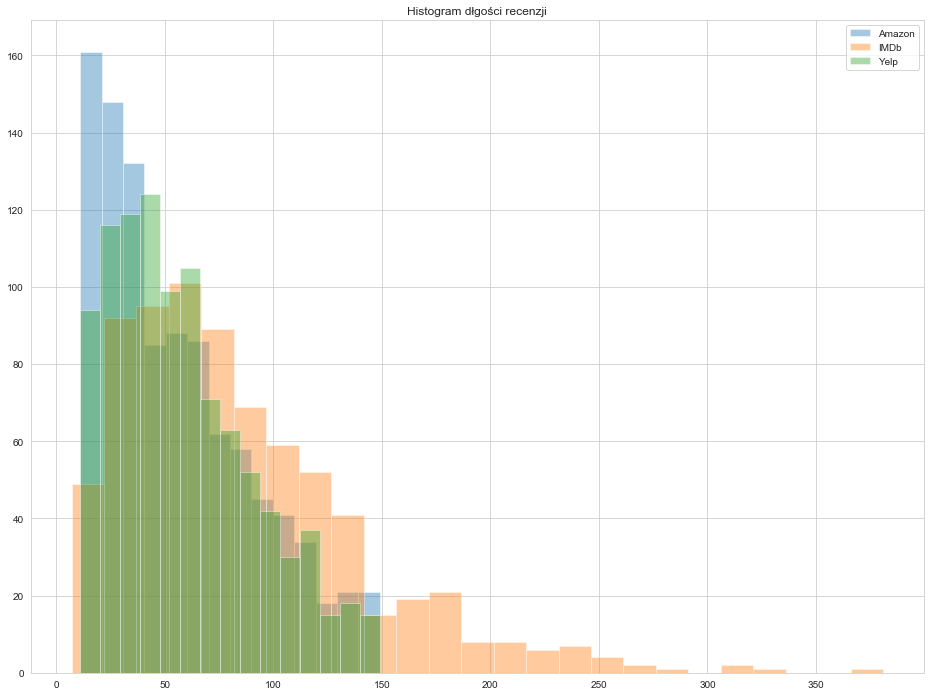

In [7]:
plt.figure(figsize=(16,12))

sns.set_style("whitegrid")
am_lens = list(map(len, amazon[0]))
sns.distplot(am_lens, kde=False)

im_lens = [ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i < 400]
#plt.xlim([0, 500])
sns.distplot(im_lens, kde=False)

ye_lens = list(map(len, yelp[0]))
sns.distplot(ye_lens, kde=False)


plt.title("Histogram dłgości recenzji")
plt.legend(["Amazon", "IMDb", "Yelp"])

In [8]:
np.mean(am_lens)

55.226

In [9]:
np.mean(list(map(len, imdb.drop(index=136, axis=0)[0])))

100.50066934404283

In [10]:
np.mean(ye_lens)

58.316

In [11]:
[ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i > 400]

[4778, 1053, 1562, 479, 4487]

In [56]:
amazon[0]

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: 0, Length: 1000, dtype: object

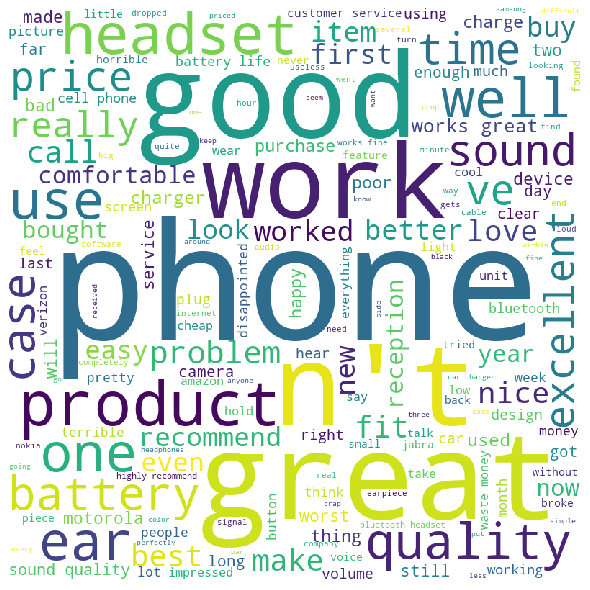

# COUNT VECTORIZER + MULTINOMIAL NAIVE BAYES

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [70]:
count_vect_a = CountVectorizer()
a_vec = count_vect_a.fit_transform(amazon[0])
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(a_vec, amazon[1])

a_svm = MultinomialNB()
a_svm.fit(X_train_a, y_train_a)
a_svm.score(X_test_a, y_test_a)

0.848

In [17]:
count_vect_i = CountVectorizer()
i_vec = count_vect_i.fit_transform(imdb[0])
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(i_vec, imdb[1])

i_svm = MultinomialNB()
i_svm.fit(X_train_i, y_train_i)
i_svm.score(X_test_i, y_test_i)

0.7754010695187166

In [18]:
count_vect_y = CountVectorizer()
y_vec = count_vect_y.fit_transform(yelp[0])
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(y_vec, yelp[1])

y_svm = MultinomialNB()
y_svm.fit(X_train_y, y_train_y)
y_svm.score(X_test_y, y_test_y)

0.8

### Testing other datasets with classifier trained on one of them

In [19]:
joined_reviews = np.concatenate((amazon[0], imdb[0], yelp[0]))
#joined_labels = np.concatenate((amazon[1], imdb[1], yelp[1]))

count_vect_f = CountVectorizer()
full_corpus = count_vect_f.fit(joined_reviews)

In [71]:
af_vec = count_vect_f.transform(amazon[0])
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(af_vec, amazon[1])

if_vec = count_vect_f.transform(imdb[0])
X_train_if, X_test_if, y_train_if, y_test_if = train_test_split(if_vec, imdb[1])

yf_vec = count_vect_f.transform(yelp[0])
X_train_yf, X_test_yf, y_train_yf, y_test_yf = train_test_split(yf_vec, yelp[1])

af_svm = MultinomialNB()
af_svm.fit(X_train_af, y_train_af)

yf_svm = MultinomialNB()
yf_svm.fit(X_train_yf, y_train_yf)

if_svm = MultinomialNB()
if_svm.fit(X_train_if, y_train_if)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Classifier trained on amazon data set

In [72]:
print(af_svm.score(X_test_af, y_test_af))
print(af_svm.score(X_test_if, y_test_if))
print(af_svm.score(X_test_yf, y_test_yf))

0.84
0.7433155080213903
0.716


### Classifier trained on imdb data set

In [22]:
print(if_svm.score(X_test_af, y_test_af))
print(if_svm.score(X_test_if, y_test_if))
print(if_svm.score(X_test_yf, y_test_yf))

0.704
0.7112299465240641
0.632


### Classifier trained on yelp data set

In [23]:
print(yf_svm.score(X_test_af, y_test_af))
print(yf_svm.score(X_test_if, y_test_if))
print(yf_svm.score(X_test_yf, y_test_yf))

0.76
0.679144385026738
0.816


# Using built-in stop words

In [187]:
copy

0                 [way, plug, us, unless, go, converter]
1                         [good, case, excellent, value]
2                                       [great, jawbone]
3      [tied, charger, conversations, lasting, 45, mi...
4                                           [mic, great]
                             ...                        
995    [screen, get, smudged, easily, touches, ear, f...
996                    [piece, junk, lose, calls, phone]
997                               [item, match, picture]
998          [thing, disappoint, infra, red, port, irda]
999                 [answer, calls, unit, never, worked]
Name: 0, Length: 1000, dtype: object

In [188]:
def tokenize(line, tokenizer = RegexpTokenizer(r'\w+')):
    return [tokenizer.tokenize(w.lower()) for w in line]

def remove_punctuation(line):
    return "".join([c for c in line if c not in string.punctuation])

def remove_stopwords(line, stopwords = stopwords.words('english')):
    return [w for w in line if w not in stopwords]

def lemmatizer(line, lemmatizer=WordNetLemmatizer()):
    return [lemmatizer.lemmatize(w) for w in line]

def stemmer(line, stemmer=PorterStemmer()):
    return [stemmer.stem(w) for w in line]

def text_pipeline(text_data):
    transformed = text_data.apply(remove_punctuation)
    transformed = transformed.apply(lambda x:tokenize(x.lower))
    transformed = transformed.apply(remove_stopwords)
    #transformed = transformed.apply(lemmatizer)
    return transformed

In [196]:
copy = amazon[0].copy()
copy = copy.apply(remove_punctuation)
#copy.apply(tokenize)
copy

0      So there is no way for me to plug it in here i...
1                              Good case Excellent value
2                                  Great for the jawbone
3      Tied to charger for conversations lasting more...
4                                       The mic is great
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk I lose more calls on this...
997                          Item Does Not Match Picture
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit never w...
Name: 0, Length: 1000, dtype: object

In [189]:
am_trans = text_pipeline(amazon[0])

In [190]:
am_trans

0      [[s], [o], [], [t], [h], [e], [r], [e], [], [i...
1      [[g], [o], [o], [d], [], [c], [a], [s], [e], [...
2      [[g], [r], [e], [a], [t], [], [f], [o], [r], [...
3      [[t], [i], [e], [d], [], [t], [o], [], [c], [h...
4      [[t], [h], [e], [], [m], [i], [c], [], [i], [s...
                             ...                        
995    [[t], [h], [e], [], [s], [c], [r], [e], [e], [...
996    [[w], [h], [a], [t], [], [a], [], [p], [i], [e...
997    [[i], [t], [e], [m], [], [d], [o], [e], [s], [...
998    [[t], [h], [e], [], [o], [n], [l], [y], [], [t...
999    [[y], [o], [u], [], [c], [a], [n], [], [n], [o...
Name: 0, Length: 1000, dtype: object

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [147]:
count_vect_a = CountVectorizer()
a_vec = count_vect_a.fit_transform(amazon_text)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(a_vec, amazon[1])

a_svm = MultinomialNB()
a_svm.fit(X_train_a, y_train_a)
a_svm.score(X_test_a, y_test_a)

AttributeError: 'list' object has no attribute 'lower'

In [40]:
count_vect_a1 = CountVectorizer()
a_vec = count_vect_a1.fit_transform(amazon[0])
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(a_vec, amazon[1])


a_svm = MultinomialNB()
a_svm.fit(X_train_a, y_train_a)
print(a_svm.score(X_test_a, y_test_a))


count_vect_a1 = CountVectorizer(stop_words='english')
a_vec = count_vect_a1.fit_transform(amazon[0])
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(a_vec, amazon[1])


a_svm = MultinomialNB()
a_svm.fit(X_train_a, y_train_a)
print(a_svm.score(X_test_a, y_test_a))


0.872
0.772


In [48]:
count_vect_i = CountVectorizer()
i_vec = count_vect_i.fit_transform(imdb[0])
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(i_vec, imdb[1])

i_svm = MultinomialNB()
i_svm.fit(X_train_i, y_train_i)
print(i_svm.score(X_test_i, y_test_i))

count_vect_i = CountVectorizer(stop_words='english')
i_vec = count_vect_i.fit_transform(imdb[0])
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(i_vec, imdb[1])

i_svm = MultinomialNB()
i_svm.fit(X_train_i, y_train_i)
print(i_svm.score(X_test_i, y_test_i))

0.732620320855615
0.786096256684492


In [52]:
count_vect_y = CountVectorizer()
y_vec = count_vect_y.fit_transform(yelp[0])
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(y_vec, yelp[1])

y_svm = MultinomialNB()
y_svm.fit(X_train_y, y_train_y)
print(y_svm.score(X_test_y, y_test_y))

count_vect_y = CountVectorizer(stop_words='english')
y_vec = count_vect_y.fit_transform(yelp[0])
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(y_vec, yelp[1])

y_svm = MultinomialNB()
y_svm.fit(X_train_y, y_train_y)
print(y_svm.score(X_test_y, y_test_y))

0.8
0.788


# Text pipeline

In [ ]:
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [101]:
amazon_text = amazon.copy()
amazon_text[0] = [entry.lower() for entry in amazon_text[0]]
amazon_text[0] = [word_tokenize(entry) for entry in amazon_text[0]]

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [123]:
copy = amazon[0].copy()

In [124]:
copy

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: 0, Length: 1000, dtype: object

In [122]:
copy

0      [so, there, is, no, way, for, me, to, plug, it...
1                   [good, case, ,, excellent, value, .]
2                          [great, for, the, jawbone, .]
3      [tied, to, charger, for, conversations, lastin...
4                               [the, mic, is, great, .]
                             ...                        
995    [the, screen, does, get, smudged, easily, beca...
996    [what, a, piece, of, junk.., i, lose, more, ca...
997                 [item, does, not, match, picture, .]
998    [the, only, thing, that, disappoint, me, is, t...
999    [you, can, not, answer, calls, with, the, unit...
Name: 0, Length: 1000, dtype: object

In [131]:
copy = text_pipeline(copy)

In [130]:
def text_pipeline(text_data):
    text_data = [entry.lower() for entry in text_data]
    text_data = [word_tokenize(entry) for entry in text_data]
    return text_data

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: 0, Length: 1000, dtype: object

In [108]:
imdb_text = imdb.copy()
imdb[0] = [entry.lower() for entry in imdb_text[0]]
imdb_text[0] = [word_tokenize(entry) for entry in imdb_text[0]]

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [87]:
(text)

list